**Objective:**

The primary objective of this project is to gather relevant data from various online sources and analyze it to gain insights into the key drivers and trends impacting Indonesia's economic growth. By employing web scraping techniques, we can efficiently collect real-time data on key economic indicators, market trends, government policies, and industry developments.

In [1]:
#for web scrapping
import requests
from bs4 import BeautifulSoup

#for data manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 20)

#for visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn
import ipywidgets as widgets
from IPython.display import display

#for warnings
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
pd.set_option('display.max_columns', 20)

url = "https://id.wikipedia.org/wiki/Ekonomi_Indonesia#Data"
req = requests.get(url)
soup = BeautifulSoup(req.content, 'html.parser')

# searching the table class 'wikitable sortable'
table = soup.find_all('table', {'class': 'wikitable sortable'})[0]

# Baca tabel dan konversi menjadi dataframe
df = pd.read_html(str(table))[0]

# show dataframe
df.head()

,Tahun,PDB (KKB) (miliar USD)[47],PDB (KKB) per kapita (USD)[48],Persentase dari total PDB (KKB) dunia,Pertumbuhan PDB (KKB) (riil)[49],Pertumbuhan PDB (KKB) per kapita (riil)[50],Tingkat inflasi [51],Hutang pemerintah (dari PDB (KKB))[52]
0,1980,1899,1.287,"1,42%","9,88%",NaN,"▲ 18,0%",NaN
1,1981,2236,1.487,"1,50%","7,60%",NaN,"▲ 12,2%",NaN
2,1982,2428,1.583,"1,53%","2,24%",NaN,"▲ 9,48%",NaN
3,1983,2629,1.681,"1,56%","4,19%",NaN,"▲ 11,7%",NaN
4,1984,2930,1.837,"1,61%","7,57%",NaN,"▲ 10,4%",NaN


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Tahun                                         43 non-null     int64  
 1   PDB (KKB) (miliar USD)[47]                    43 non-null     object 
 2   PDB (KKB) per kapita (USD)[48]                43 non-null     float64
 3   Persentase dari total PDB (KKB) dunia         43 non-null     object 
 4   Pertumbuhan PDB (KKB)  (riil)[49]             43 non-null     object 
 5   Pertumbuhan PDB (KKB) per kapita  (riil)[50]  30 non-null     object 
 6   Tingkat inflasi [51]                          43 non-null     object 
 7   Hutang pemerintah (dari PDB (KKB))[52]        33 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.8+ KB


(43, 8)

#Data Preprocesing

In [4]:
# preprocessing data: remove any unique symbol on the data
df = df.replace({'\[\d+\]': ''}, regex=True)
df = df.replace({'\%': '', ',': ''}, regex=True)
df = df.replace({'▲ ': '', '▼ ': ''}, regex=True)


# changin the data type columns into numerical
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

df.head()

,Tahun,PDB (KKB) (miliar USD)[47],PDB (KKB) per kapita (USD)[48],Persentase dari total PDB (KKB) dunia,Pertumbuhan PDB (KKB) (riil)[49],Pertumbuhan PDB (KKB) per kapita (riil)[50],Tingkat inflasi [51],Hutang pemerintah (dari PDB (KKB))[52]
0,1980,1899.0,1.287,142,988,NaN,180,NaN
1,1981,2236.0,1.487,150,760,NaN,122,NaN
2,1982,2428.0,1.583,153,224,NaN,948,NaN
3,1983,2629.0,1.681,156,419,NaN,117,NaN
4,1984,2930.0,1.837,161,757,NaN,104,NaN


In [5]:
# Convert 'Tahun' column to datetime format with the correct format specifier
df['Tahun'] = pd.to_datetime(df['Tahun'], format='%Y')

# Extract the year information from the datetime column
df['Year'] = df['Tahun'].dt.year
df["Year"] = pd.to_datetime(df['Year'], format='%Y')

#cross check for the columns and changing the name columns
df['PDB (KKB) (miliar USD)[47]'] = df['PDB (KKB) (miliar USD)[47]'].astype(int)
df['Persentase dari total PDB (KKB) dunia'] = df['Persentase dari total PDB (KKB) dunia'].astype(float)
df['Pertumbuhan PDB (KKB)  (riil)[49]'] = df['Pertumbuhan PDB (KKB)  (riil)[49]'].astype(float)
df['Pertumbuhan PDB (KKB) per kapita  (riil)[50]'] = df['Pertumbuhan PDB (KKB) per kapita  (riil)[50]'].astype(float)
df['Tingkat inflasi [51]'] = df['Tingkat inflasi [51]'].astype(float)
df['Hutang pemerintah (dari PDB (KKB))[52]'] = df['Hutang pemerintah (dari PDB (KKB))[52]'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Tahun                                         43 non-null     datetime64[ns]
 1   PDB (KKB) (miliar USD)[47]                    43 non-null     int64         
 2   PDB (KKB) per kapita (USD)[48]                43 non-null     float64       
 3   Persentase dari total PDB (KKB) dunia         43 non-null     float64       
 4   Pertumbuhan PDB (KKB)  (riil)[49]             43 non-null     float64       
 5   Pertumbuhan PDB (KKB) per kapita  (riil)[50]  30 non-null     float64       
 6   Tingkat inflasi [51]                          43 non-null     float64       
 7   Hutang pemerintah (dari PDB (KKB))[52]        33 non-null     float64       
 8   Year                                          43 non-null     datetime64[

In [6]:
df = df.rename(columns={
    'PDB (KKB) (miliar USD)[47]': 'PDB (KKB)',
    'PDB (KKB) per kapita (USD)[48]': 'PDB per Kapita',
    'Persentase dari total PDB (KKB) dunia': 'Persentase PDB Dunia',
    'Pertumbuhan PDB (KKB)  (riil)[49]': 'Pertumbuhan PDB (rill)',
    'Pertumbuhan PDB (KKB) per kapita  (riil)[50]': 'Pertumbuhan PDB per Kapita',
    'Tingkat inflasi [51]': 'Inflasi',
    'Hutang pemerintah (dari PDB (KKB))[52]': 'Hutang Pemerintah'
})


In [7]:
df.head()

,Tahun,PDB (KKB),PDB per Kapita,Persentase PDB Dunia,Pertumbuhan PDB (rill),Pertumbuhan PDB per Kapita,Inflasi,Hutang Pemerintah,Year
0,1980-01-01,1899,1.287,142.0,988.0,NaN,180.0,NaN,1980-01-01
1,1981-01-01,2236,1.487,150.0,760.0,NaN,122.0,NaN,1981-01-01
2,1982-01-01,2428,1.583,153.0,224.0,NaN,948.0,NaN,1982-01-01
3,1983-01-01,2629,1.681,156.0,419.0,NaN,117.0,NaN,1983-01-01
4,1984-01-01,2930,1.837,161.0,757.0,NaN,104.0,NaN,1984-01-01


In [8]:
df.describe()

,PDB (KKB),PDB per Kapita,Persentase PDB Dunia,Pertumbuhan PDB (rill),Pertumbuhan PDB per Kapita,Inflasi,Hutang Pemerintah
count,43.000000,43.000000,43.000000,43.000000,30.000000,43.000000,33.000000
mean,2382.325581,6.201721,211.093023,512.744186,348.800000,122.488372,396.363636
std,3239.506324,3.718568,31.645969,352.504853,361.196708,170.849610,160.694356
min,1.000000,1.287000,142.000000,-1312.000000,-1435.000000,15.000000,229.000000
25%,1.500000,3.214500,195.000000,474.000000,349.750000,53.500000,279.000000
50%,3.000000,5.134000,214.000000,555.000000,404.000000,82.000000,365.000000
75%,3952.500000,9.523000,238.000000,674.000000,475.500000,124.000000,452.000000
max,9778.000000,13.981000,255.000000,988.000000,656.000000,948.000000,874.000000


# Data Visualization

In [9]:
rcParams['figure.figsize'] = 20,10
rcParams['lines.linewidth'] = 2.5
# rcParams['xticks.rotation'] = 25
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

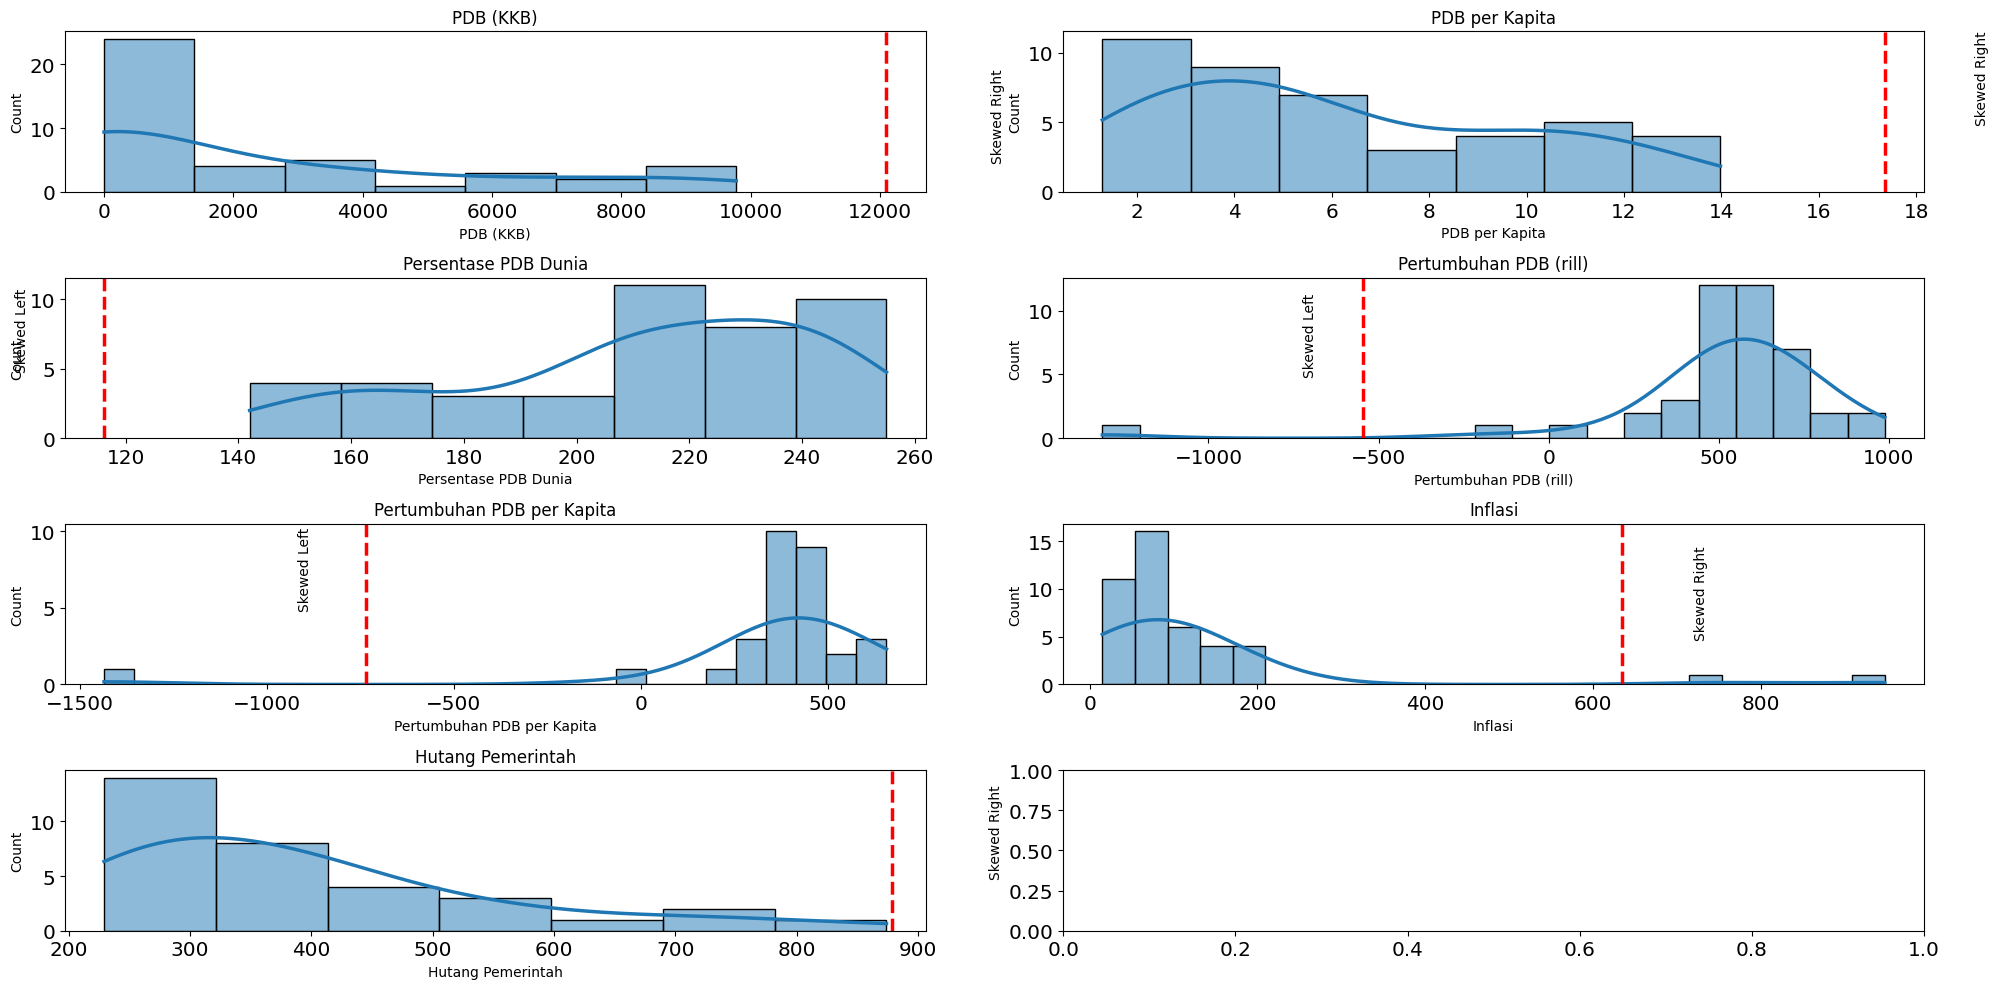

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the specified columns from the DataFrame
selected_columns = ['PDB (KKB)', 'PDB per Kapita', 'Persentase PDB Dunia', 'Pertumbuhan PDB (rill)',
                    'Pertumbuhan PDB per Kapita', 'Inflasi', 'Hutang Pemerintah']
numeric_columns = df[selected_columns]

# Calculate skewness
skew = numeric_columns.skew()

# Set the number of columns and rows for the subplots
num_rows = 4  # Number of rows for subplots
num_cols = 2  # Number of columns for subplots

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop to create histogram and add skewness indicators
for i, col in enumerate(numeric_columns.columns):
    sns.histplot(numeric_columns[col], kde=True, ax=axes[i])
    if skew[col] > 0:
        axes[i].axvline(numeric_columns[col].mean() + (3 * numeric_columns[col].std()), color='red', linestyle='--')
        axes[i].text(numeric_columns[col].mean() + (3.5 * numeric_columns[col].std()), 5, "Skewed Right", rotation=90)
    elif skew[col] < 0:
        axes[i].axvline(numeric_columns[col].mean() - (3 * numeric_columns[col].std()), color='red', linestyle='--')
        axes[i].text(numeric_columns[col].mean() - (3.5 * numeric_columns[col].std()), 5, "Skewed Left", rotation=90)
    else:
        axes[i].text(numeric_columns[col].mean() - (0.5 * numeric_columns[col].std()), 5, "Symmetric", rotation=90)
    axes[i].set_title(col)

# Remove empty subplots if the number of columns x rows is not a perfect fit
if len(numeric_columns) < num_rows * num_cols:
    for j in range(len(numeric_columns), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

If the results of the analysis show that many distributions have a slope to the right, it means that a lot of data tends to be concentrated with low values, while a small portion of the data has very high values. This can occur in economic data, such as an income distribution where a large proportion of the population has low incomes, while a small proportion have very high incomes. Slope to the right can also occur in financial data such as stock prices, where most prices tend to be stable but sometimes there are sharp price increases.

Dropdown(description='Economic Indicator:', options=('PDB (KKB)', 'PDB per Kapita', 'Persentase PDB Dunia', 'P…

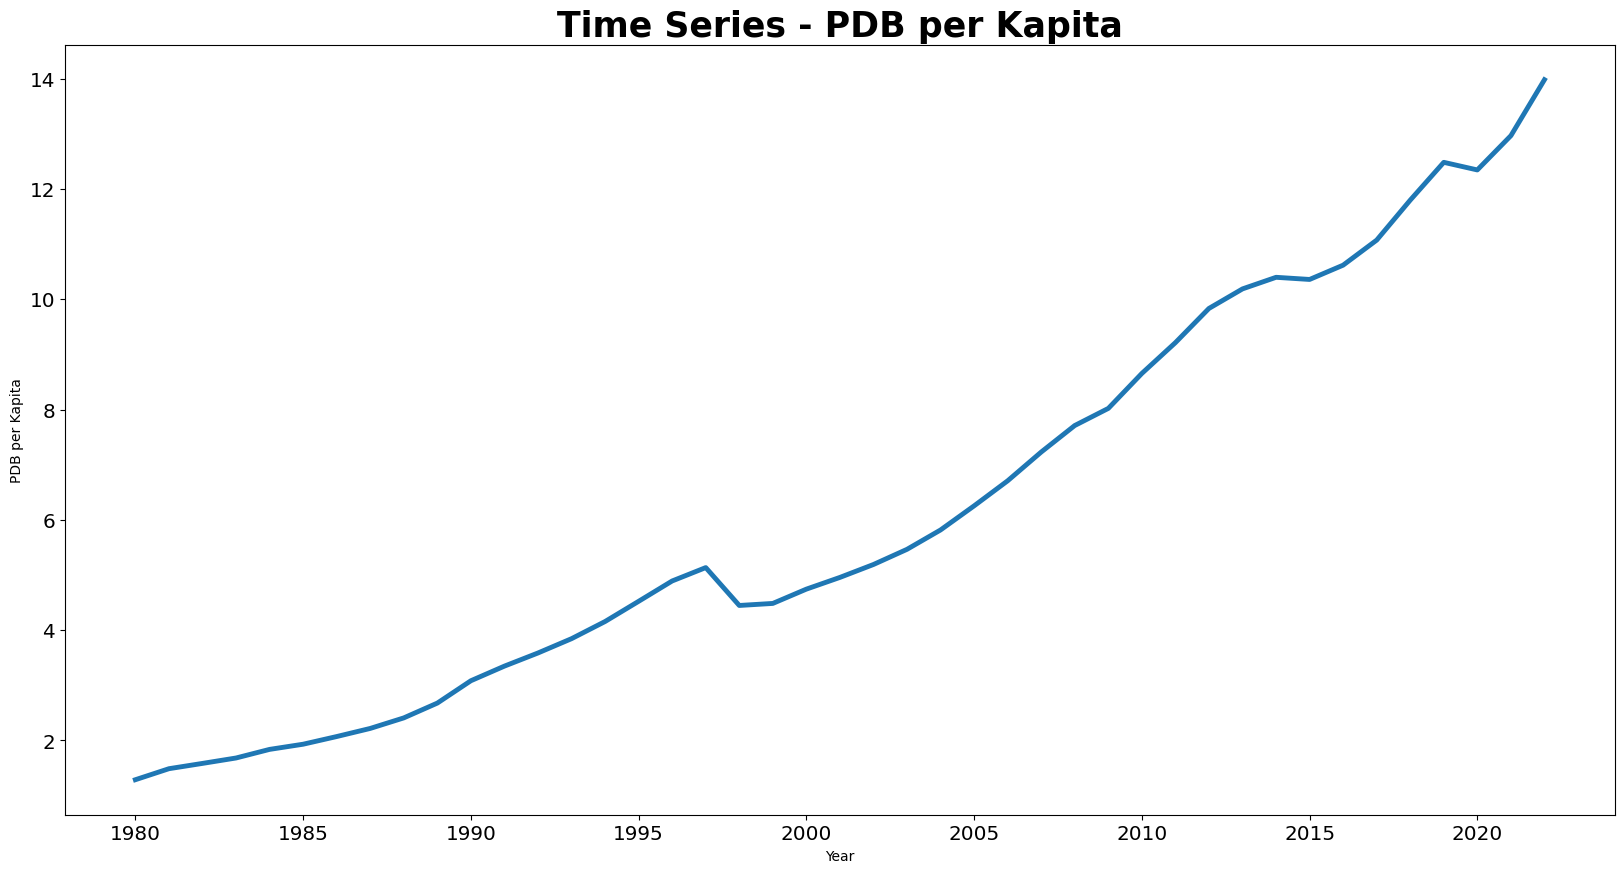

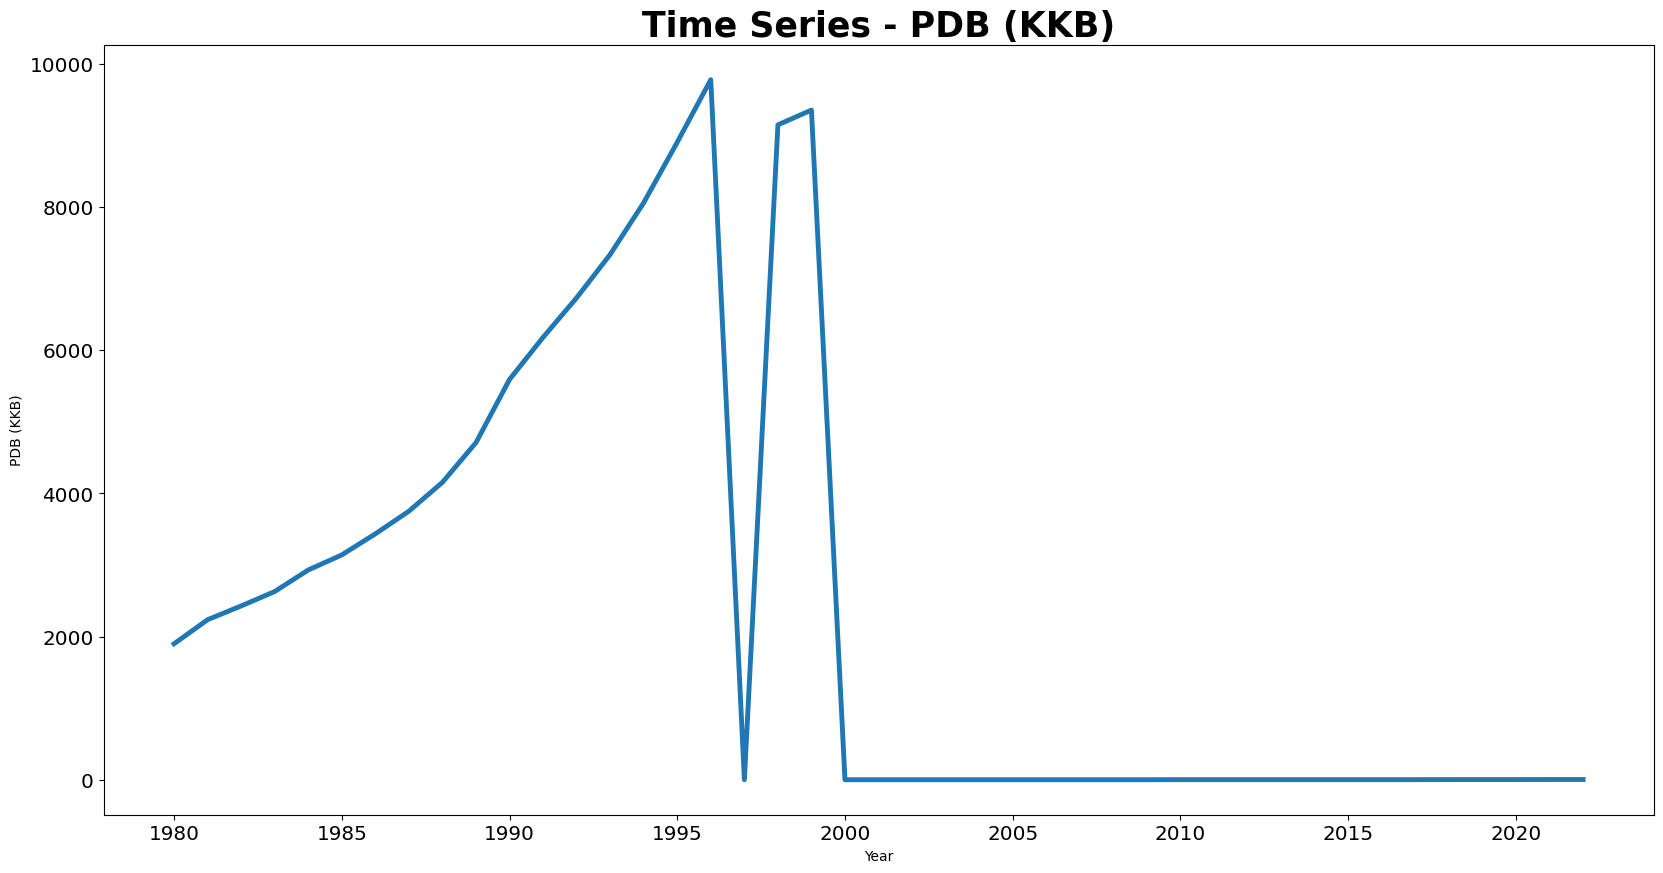

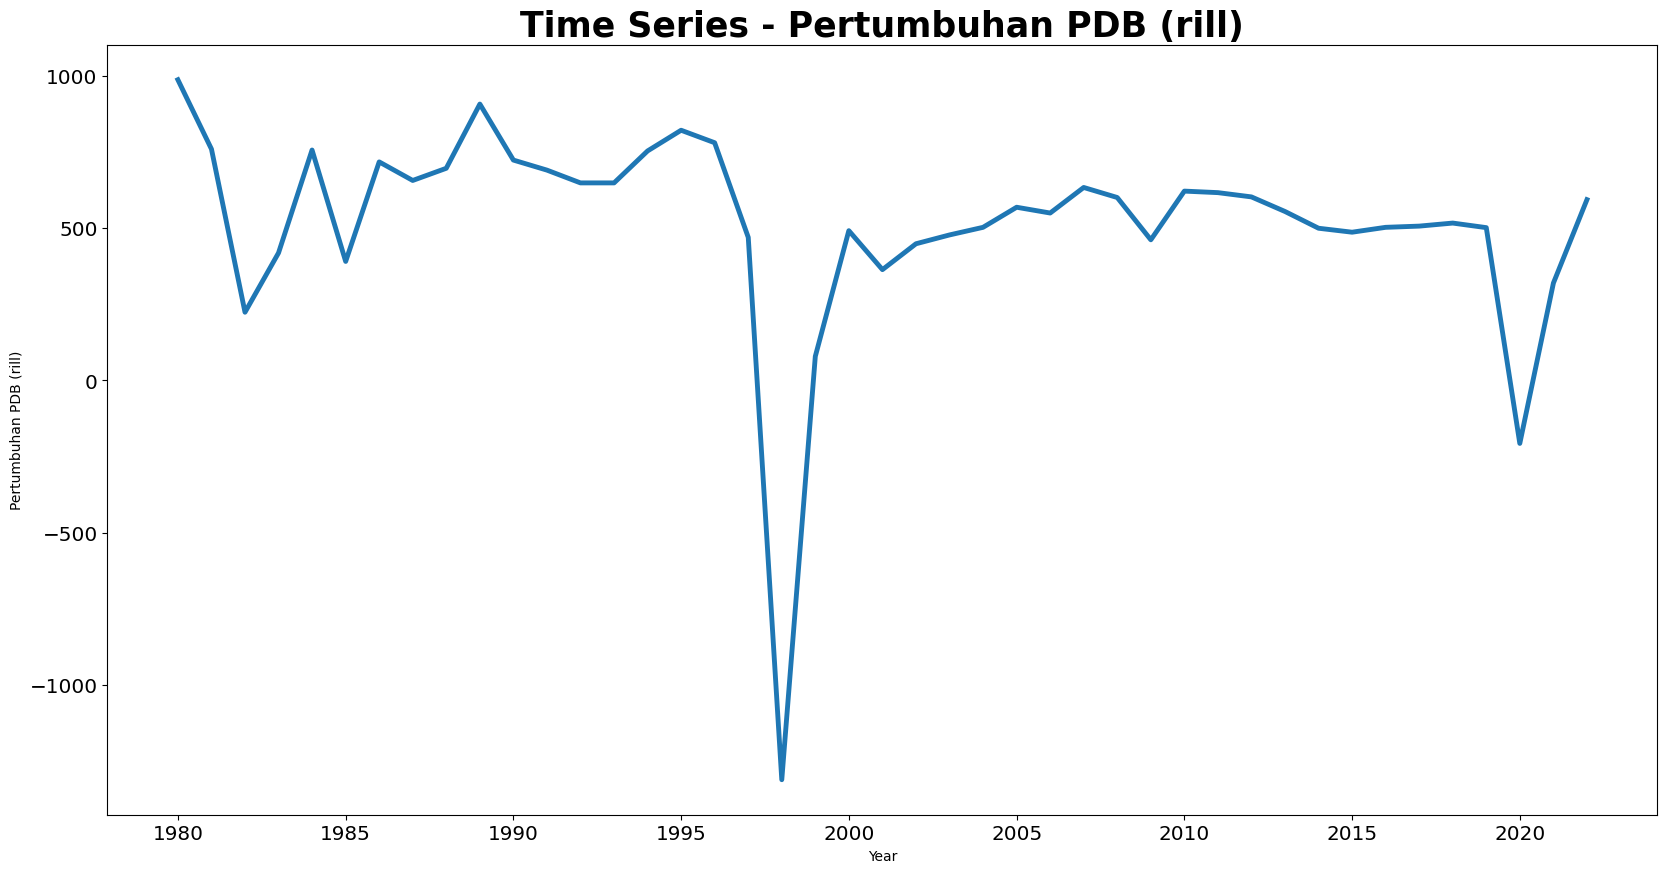

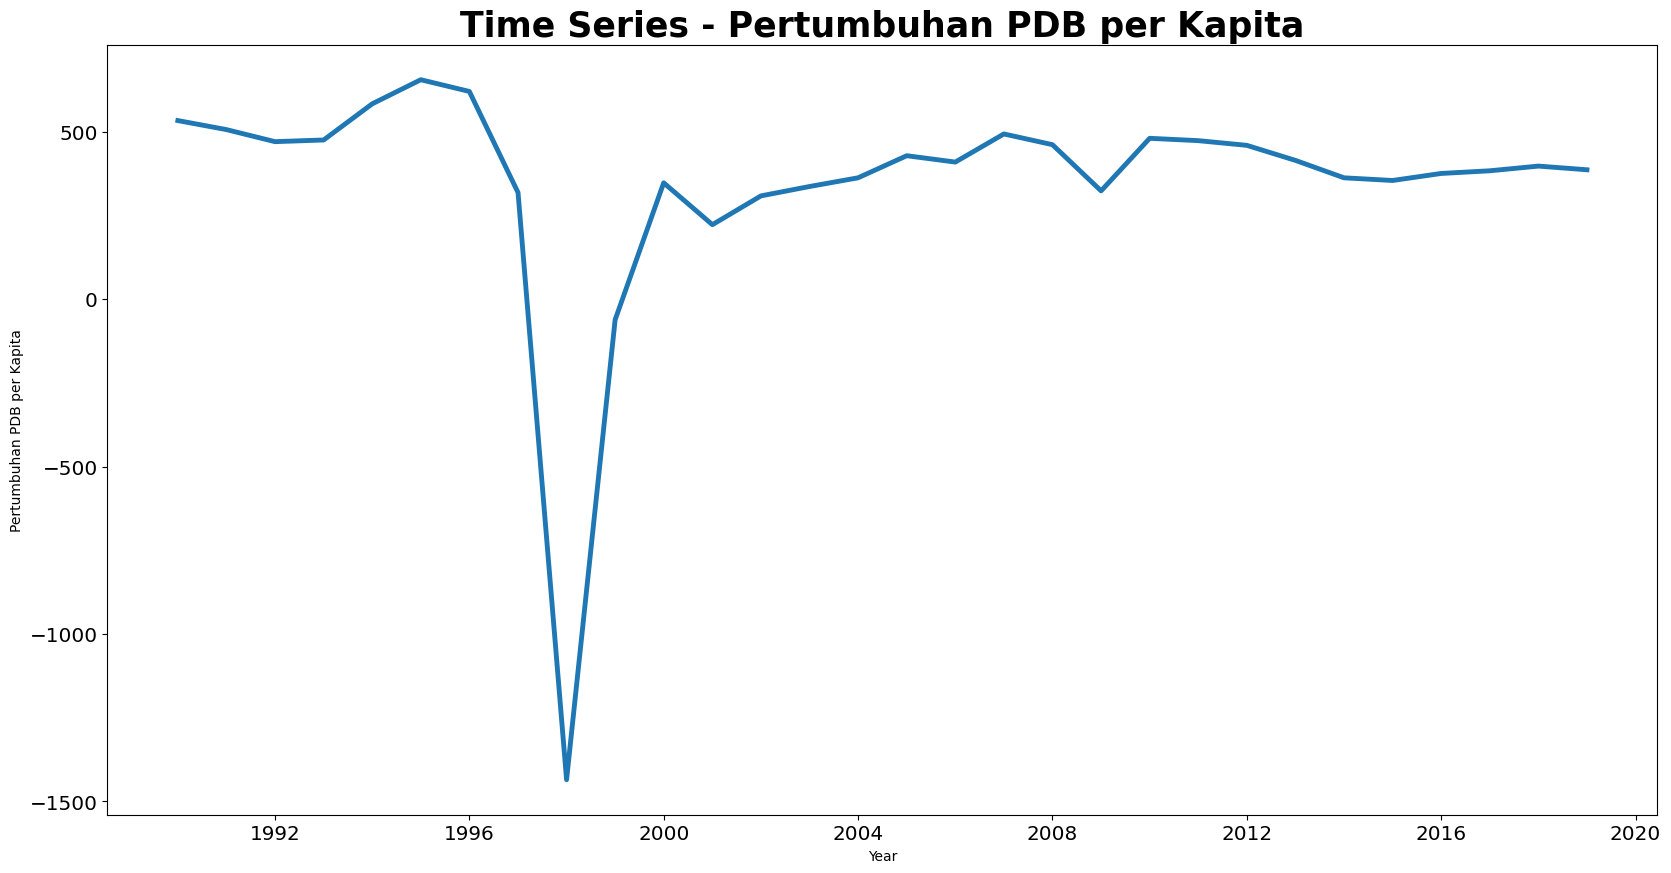

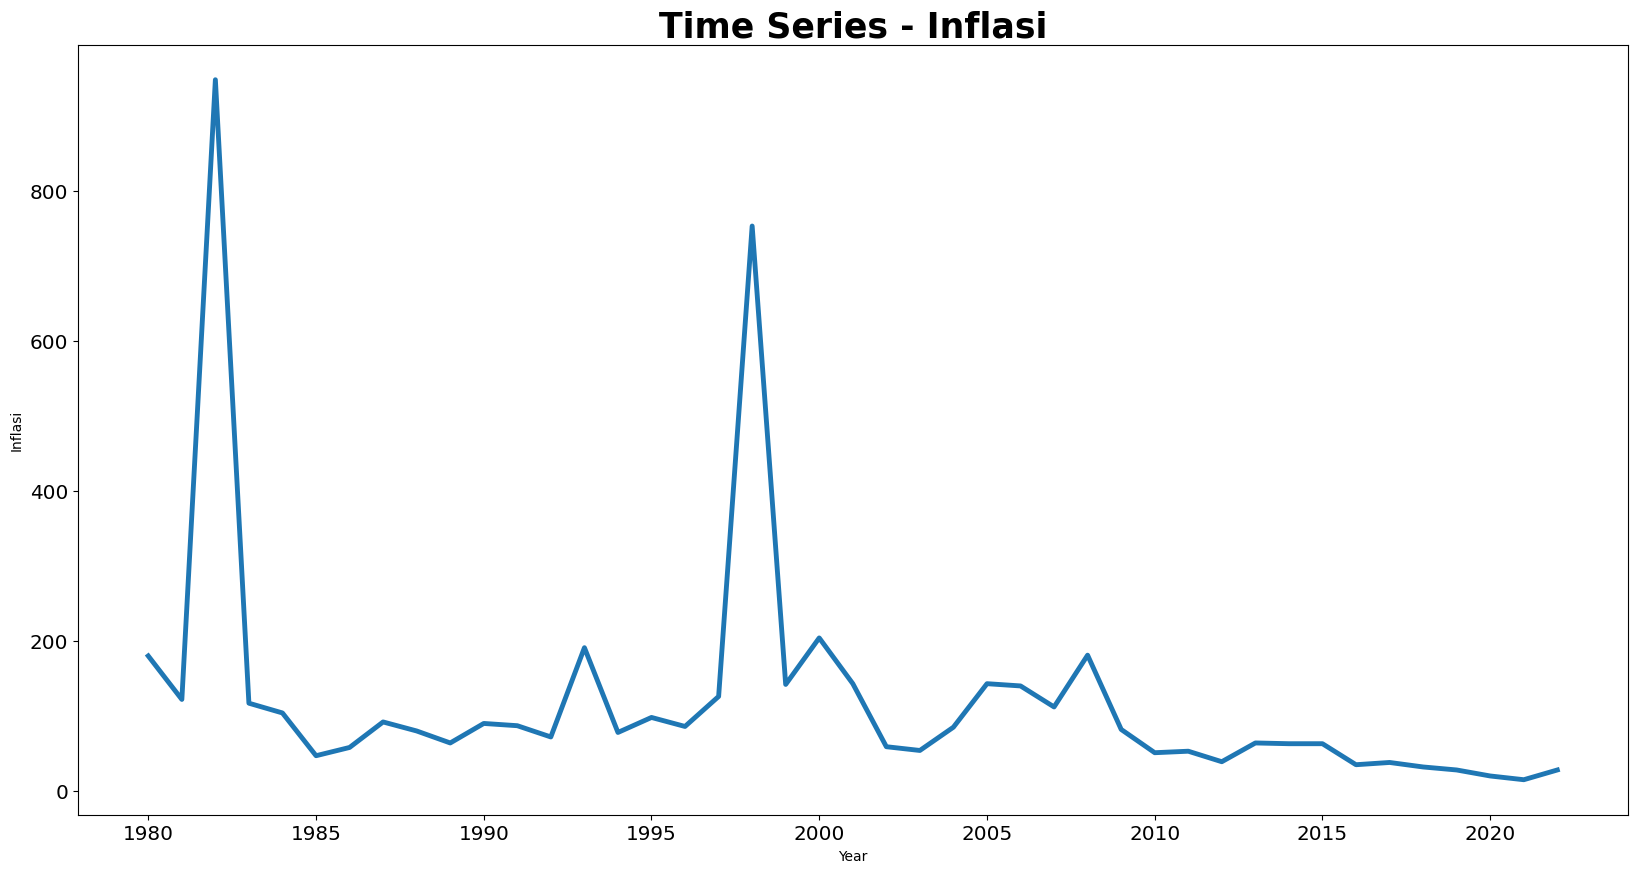

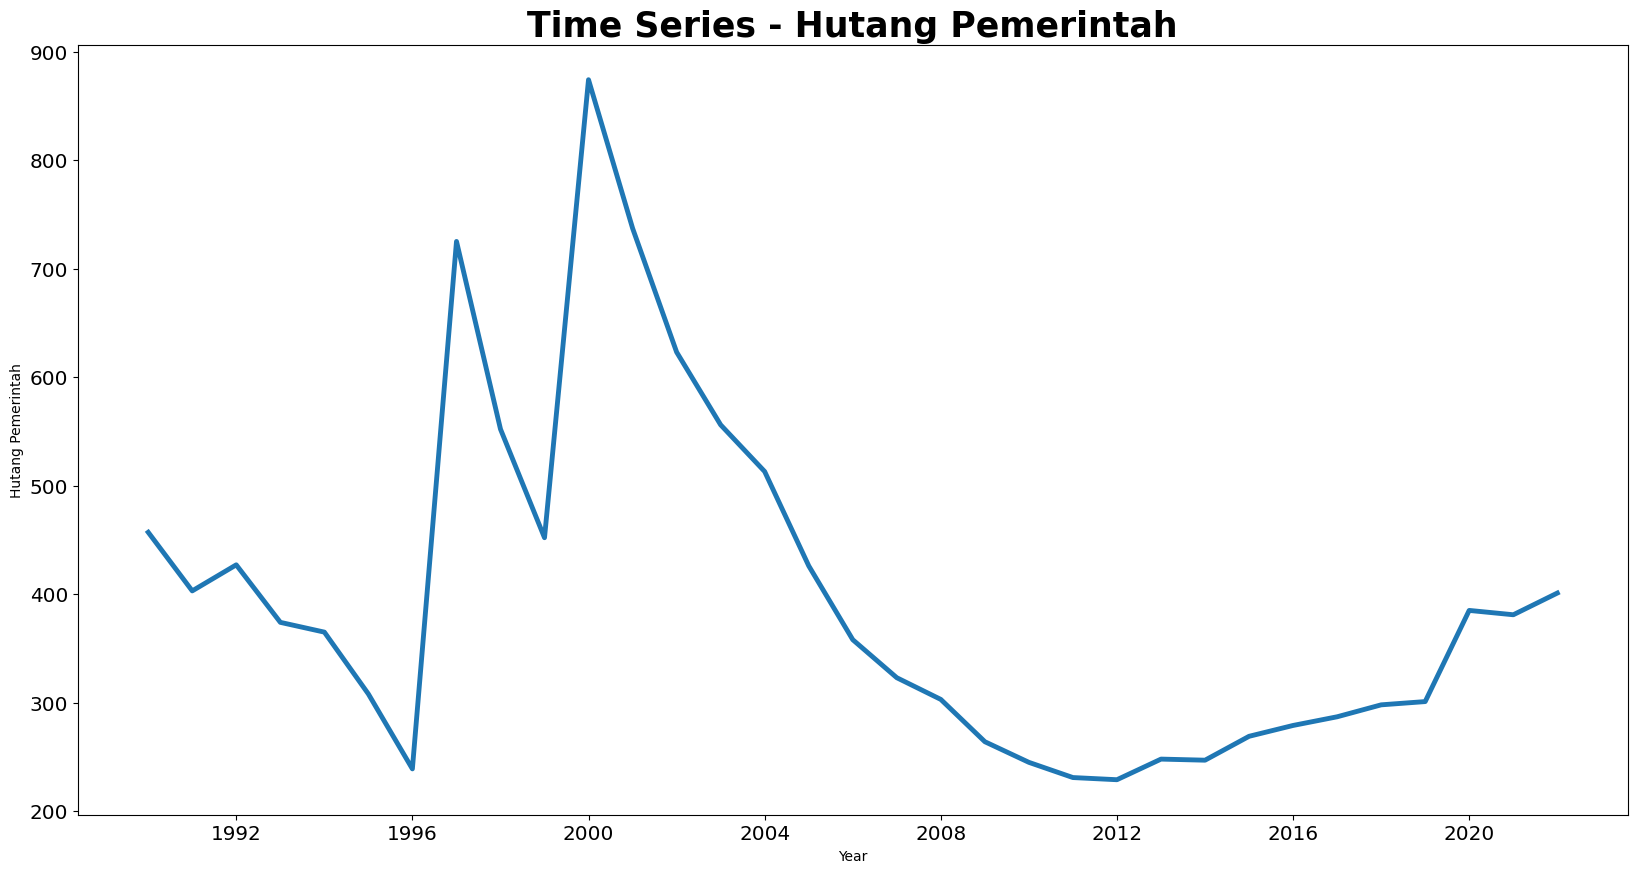

In [11]:
# Define a function to plot the time series for a given economic indicator
def plot_time_series(column):
    plt.plot(df['Year'], df[column], lw = 3.5)
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.title(f'Time Series - {column}', fontsize= 25, fontweight = 'bold')
    plt.grid(False)
    plt.show()

# Create a dropdown widget to select the economic indicator
indicator_dropdown = widgets.Dropdown(
    options=df.columns[1:],
    description='Economic Indicator:',
)

# Define an event handler for the dropdown widget
def on_dropdown_change(change):
    if change['name'] == 'value':
        column = change['new']
        plot_time_series(column)

# Register the event handler with the dropdown widget
indicator_dropdown.observe(on_dropdown_change)

# Display the dropdown widget
display(indicator_dropdown)

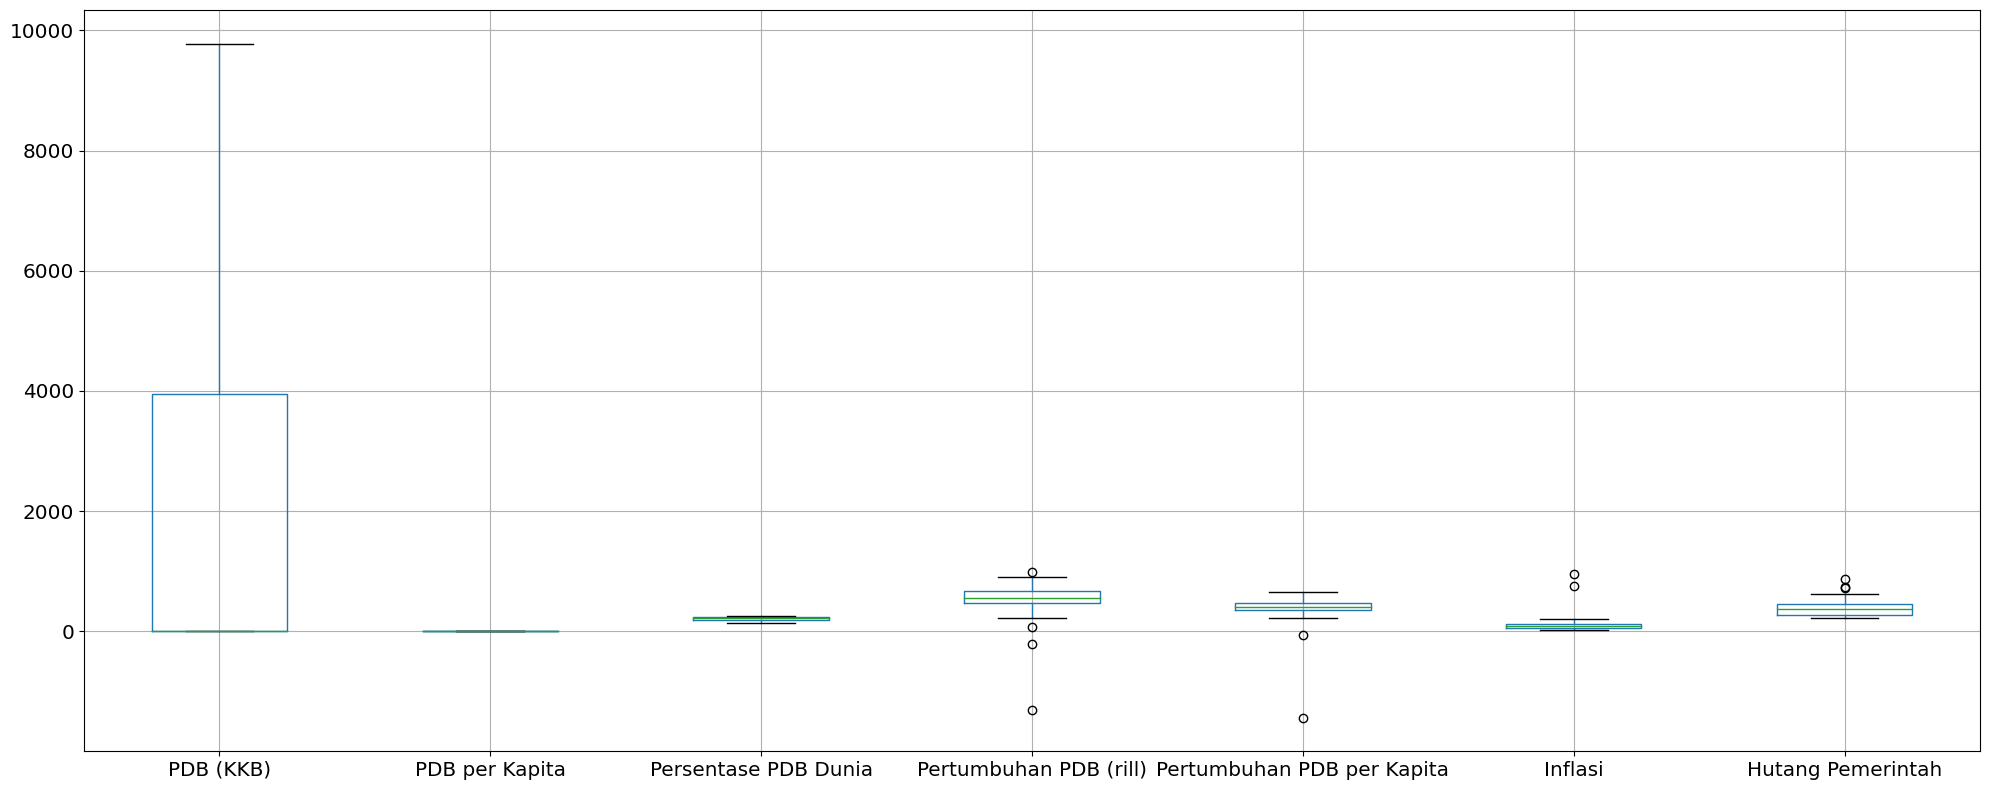

In [12]:
# Gambar boxplot untuk melihat outlier
plt.figure(figsize=(20,8))

df.boxplot()
plt.tight_layout()
plt.show()

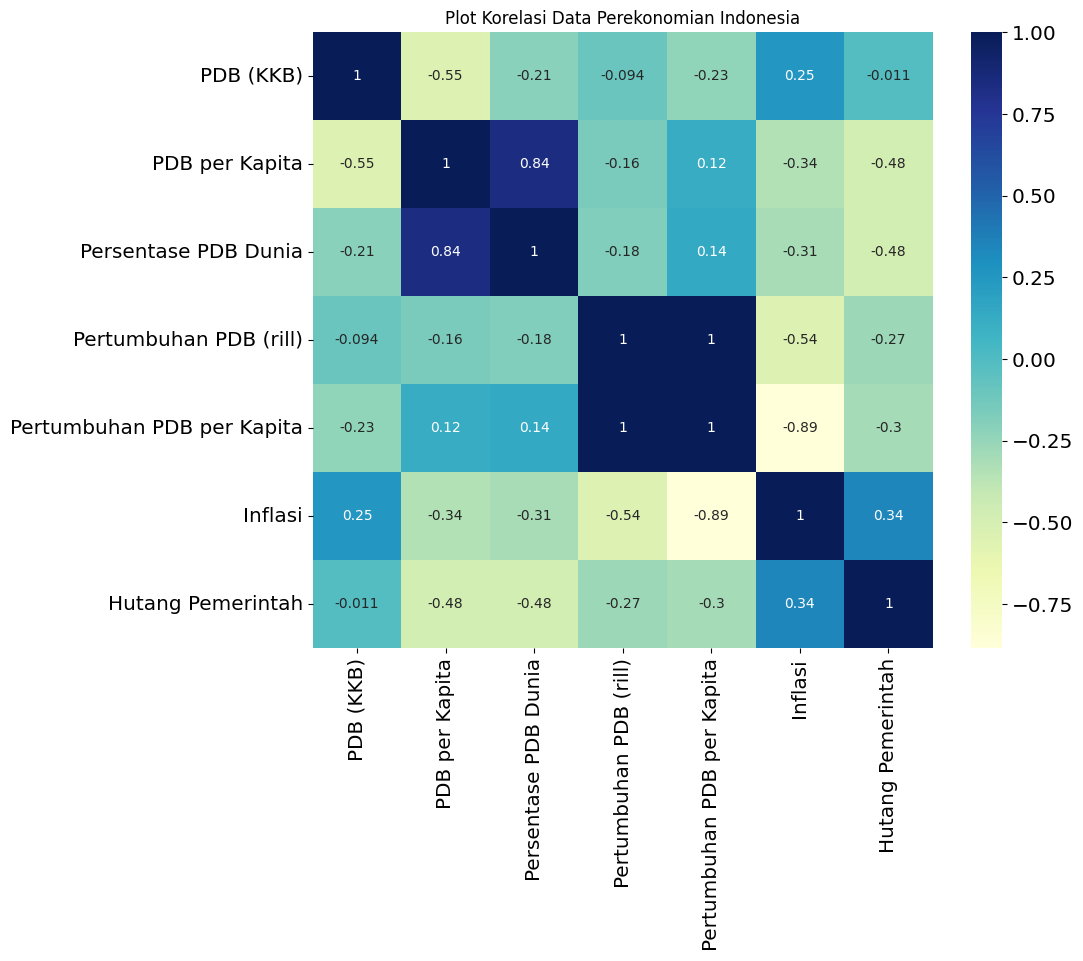

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat plot korelasi
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Plot Korelasi Data Perekonomian Indonesia")
plt.show()

From the correlation results above, some conclusions can be drawn as follows:

* GDP (KKB) per capita (USD) has a strong negative correlation with GDP (KKB) (billions USD). This indicates that the higher the GDP per capita of a country, the smaller the GDP of that country.
*GDP (KKB) per capita (USD) has a strong positive correlation with the Percentage of the world's total GDP (KKB). This indicates that the higher the per capita GDP of a country, the greater the percentage of the world's total GDP it has.
*GDP (KKB) per capita (real) growth has a strong negative correlation with GDP (KKB) (billions USD) and Percentage of the world's total GDP (KKB). This indicates that the higher the per capita GDP growth of a country, the smaller the GDP and percentage of the world's total GDP.
* The inflation rate has a strong positive correlation with GDP (KKB) per capita (USD). This indicates that the higher the inflation rate of a country, the smaller the country's GDP per capita.
* Government debt (of GDP (KKB)) does not have a strong correlation with other variables. This indicates that the level of government debt of a country does not significantly affect other variables.

# GDP comparision in Southeast Asia

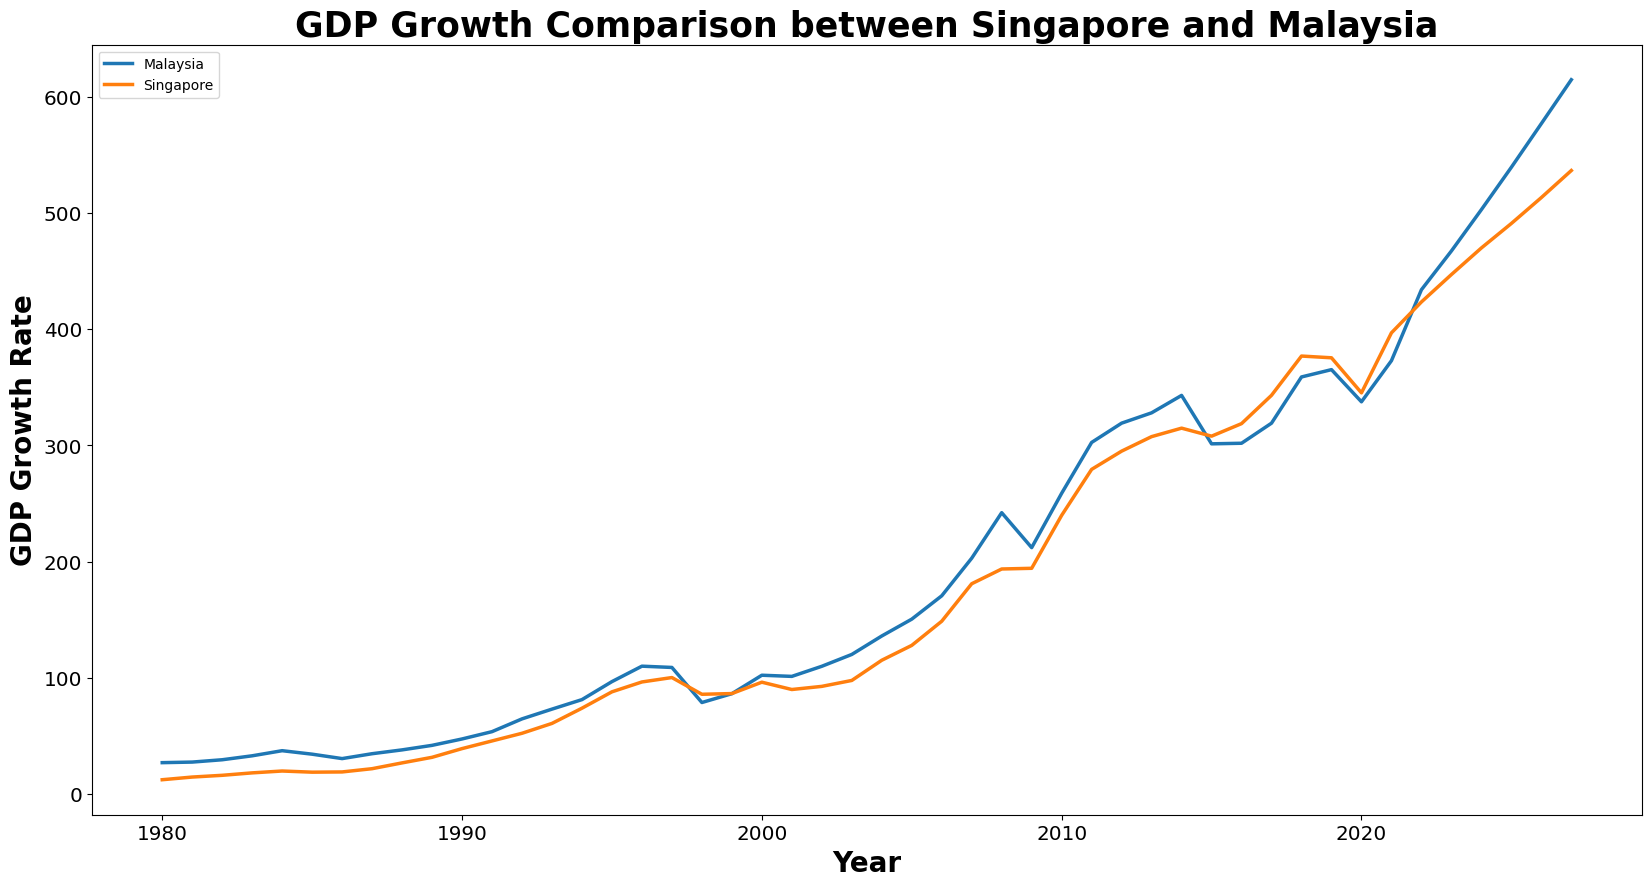

In [14]:
# Define the URLs for Malaysia and Singapore's economy Wikipedia pages
url_malaysia = 'https://en.wikipedia.org/wiki/Economy_of_Malaysia'
url_singapore = 'https://en.wikipedia.org/wiki/Economy_of_Singapore'

# Function to scrape GDP growth data from a given URL
def scrape_gdp_growth(url, country):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table containing the GDP growth data
    table = soup.find('table', class_='wikitable')

    # Create an empty DataFrame to store the scraped data
    gdp_growth_data = pd.DataFrame(columns=['Year', 'GDP Growth'])

    # Iterate through the rows of the table (excluding the header row)
    rows = table.find_all('tr')[1:]
    for row in rows:
        # Extract the cells of each row
        cells = row.find_all('td')

        # Extract the year and GDP growth rate from the cells
        year = cells[0].text.strip()
        gdp_growth_rate = cells[3].text.strip()

        # Add the scraped data to the DataFrame
        gdp_growth_data = gdp_growth_data.append({'Year': year, 'GDP Growth': gdp_growth_rate}, ignore_index=True)

    # Perform data preprocessing
    # Remove any rows with missing values
    gdp_growth_data = gdp_growth_data.dropna()

    # Convert 'Year' and 'GDP Growth' columns to numeric
    gdp_growth_data['Year'] = pd.to_numeric(gdp_growth_data['Year'], errors='coerce')
    gdp_growth_data['GDP Growth'] = pd.to_numeric(gdp_growth_data['GDP Growth'], errors='coerce')

    # Sort the DataFrame by 'Year'
    gdp_growth_data = gdp_growth_data.sort_values('Year')

    # Reset the index of the DataFrame
    gdp_growth_data = gdp_growth_data.reset_index(drop=True)

    return gdp_growth_data

# Scrape GDP growth data for Malaysia
gdp_growth_malaysia = scrape_gdp_growth(url_malaysia, 'Malaysia')

# Scrape GDP growth data for Singapore
gdp_growth_singapore = scrape_gdp_growth(url_singapore, 'Singapore')

# Create a line plot comparing the GDP growth rates of both countries
plt.plot(gdp_growth_malaysia['Year'], gdp_growth_malaysia['GDP Growth'], label='Malaysia')
plt.plot(gdp_growth_singapore['Year'], gdp_growth_singapore['GDP Growth'], label='Singapore')

# Set the plot title and labels
plt.title('GDP Growth Comparison between Singapore and Malaysia', fontsize = 25, fontweight ='bold')
plt.xlabel('Year', fontsize = 20, fontweight= 'bold')
plt.ylabel('GDP Growth Rate', fontsize = 20, fontweight= 'bold')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

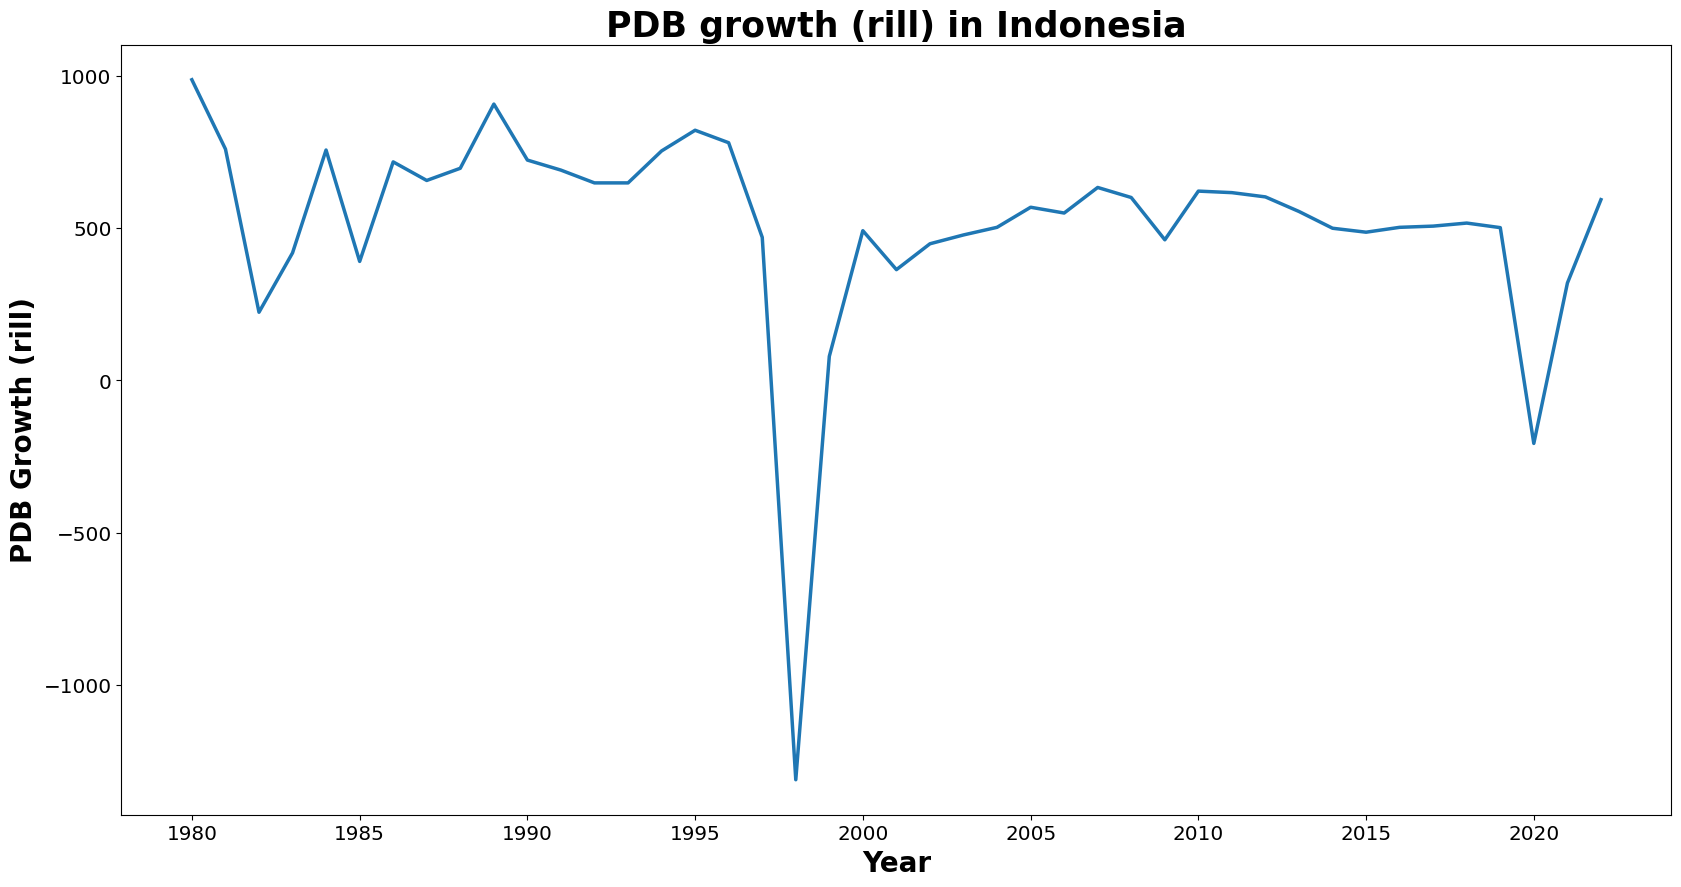

In [22]:
# Create a line plot for Pertumbuhan PDB (rill) of Indonesia
plt.plot(df['Year'], df['Pertumbuhan PDB (rill)'])

# Set the plot title and labels
plt.title('PDB growth (rill) in Indonesia', fontsize = 25, fontweight ='bold')
plt.xlabel('Year', fontsize = 20, fontweight ='bold')
plt.ylabel('PDB Growth (rill)', fontsize = 20, fontweight ='bold')

# Show the plot
plt.show()

Insight:

The analysis of GDP growth rates reveals interesting insights into the economic progress of Malaysia, Singapore, and Indonesia. Malaysia stands out with a remarkable GDP growth rate exceeding 600%, indicating a robust and rapidly expanding economy. Singapore and Indonesia also exhibit impressive growth rates, both surpassing 500%, showcasing their significant economic development.

These high GDP growth rates across the three countries reflect their potential for attracting investments, fostering innovation, and creating business opportunities. Such substantial growth rates indicate favorable economic conditions, including increased productivity, rising consumer demand, and a conducive business environment.

It is worth noting that sustaining high GDP growth rates over an extended period requires continuous efforts in areas such as infrastructure development, human capital investment, policy reforms, and diversification of industries. These insights highlight the potential economic opportunities present in Malaysia, Singapore, and Indonesia, making them attractive destinations for both domestic and international investors.